# 放射性物質の崩壊

一番単純でしかも実際に使われる微分方程式としてまずは 1 階の線型常微分方程式を考えよう.
ちょっと不吉な例であるが**放射性物質の崩壊の方程式**を紹介する.
導出をしたければちゃんと物理を勉強してもらう必要がある.
ここでは物理は省略して数学に集中する.

\begin{align}
 \frac{dx}{dt}
 =
 - c u.
\end{align}
厳密解は $x(t) = C_0 e^{-ct}$ だ.
初期値を設定すれば $C_0$ はそこから決まる.

微分を単純に離散化すると次のようになる.

\begin{align}
 \frac{x_{n+1} - x_{n}}{\Delta t}
 =
 -c x_{n}.
\end{align}

時間っぽく見えるよう $\Delta t$ と書いてみた: タイプが面倒なので $h$ と書くこともある.
整理すると次の通り.

\begin{align}
 x_{n+1}
 =
 x_{n} - c (\Delta t) x_{n}.
\end{align}

これに沿って計算したのがいわゆるオイラー法.
コードに落としていこう.

## 厳密解のグラフ

まずは厳密解 $x(t) = e^{-t}$ をグラフに描こう.
初期値は 1, 上の定数も $c = 1$ としている.

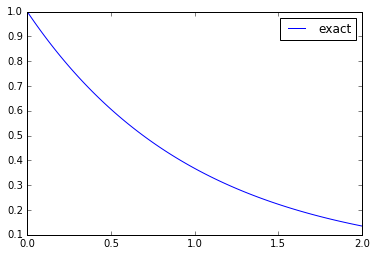

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

# 変数設定
c = 1
init = 1
nt = 100

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(- c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['exact'])
# 描画
plt.show()

## 近次解

今度は近次解を計算してグラフにしてみよう.

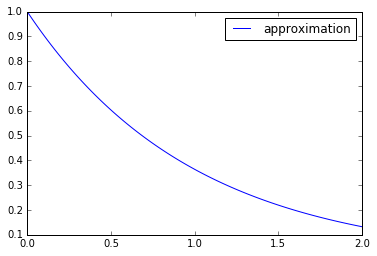

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def radioactive_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] - c * dt * x[i-1]

    # ブロードキャストすると適切な値が計算できない？
    # 要調査
    # x[1:] = x[0:-1] - c * dt * x[0:-1]

    return x

# 近似解
c = 1
init = 1
nt = 101
x_approx = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 凡例
plt.legend(['approximation'])
# 描画
plt.show()

## 比較のために重ねる

これだけではよくわからないので重ねて描いてみる.

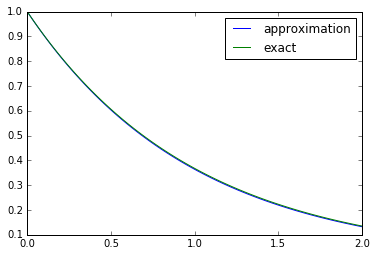

In [6]:
# 近次解
x_approx = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x_approx)

# 厳密解
t = np.linspace(0, 2, nt)
x_exact = init * np.exp(- c * t)
plt.plot(t, x_exact)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

ほぼピッタリ重なって見える.
シミュレーションの精度はけっこう良さそうだ.

もちろん細かいことを言えばいろいろあるけれども,
それはもっと進んだお話なので一旦不問にしておこう.